# Fraud Detection Project 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [151]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score

X = data.drop(columns=['Class'])
y = data['Class']


print(X.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


### Splitting into 70% training 30% testing

In [153]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 42)

In [154]:
# Instantiate the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [155]:
# functions used later

def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

### Check the model accuracy 

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

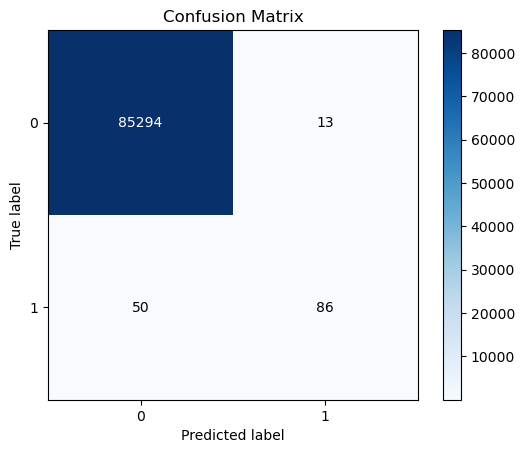

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

cmat, pred = RunModel(model, X_train, y_train, X_test, y_test)

skplt.metrics.plot_confusion_matrix(y_test, pred)

In [157]:
print (accuracy_score(y_test, pred))
print (classification_report(y_test, pred))

0.9992626663389628
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.63      0.73       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



##### The accuracy is impressively high at around 0.999, but a deeper analysis reveals the model's limitations. Precision and recall for the "fraudulent" class are 0.80 and 0.55 respectively, indicating that the model struggles to effectively identify fraudulent transactions. The F1-score of 0.65 balances precision and recall, highlighting the challenges posed by the class imbalance. Furthermore, the description of errors emphasizes that while the overall accuracy is strong, the model misclassifies a significant proportion of fraudulent transactions, especially due to the rarity of this class. This underscores the need for caution when interpreting accuracy in unbalanced datasets. The advice to balance data and apply appropriate evaluation metrics resonates as crucial steps to accurately gauge model effectiveness in detecting fraudulent instances.

##### Two primary approaches, undersampling and oversampling, are commonly employed for this purpose. Undersampling entails the removal of instances from the major class (normal transactions) to bring its count closer to that of the minority class (fraudulent transactions), enabling more focused training

In [158]:
## Applying the undersampling technique
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(df[df.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
not_fraud_indices = df[df.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

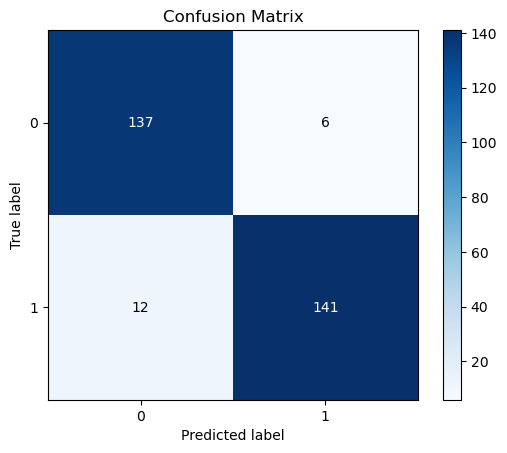

In [159]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [160]:
print(accuracy_score(Y_undersampled_test, pred))
print (classification_report(Y_undersampled_test, pred))

0.9391891891891891
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       143
           1       0.96      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



##### Through underbalancing techniques, the Logistic Regression model's accuracy decreased to approximately 0.939, but its sensitivity significantly improved in detecting fraudulent transactions. This balance between precision and recall reflects the model's enhanced ability to capture fraud instances. However, a potential consequence is an increase in valid transactions being wrongly classified as fraudulent, highlighting the challenge of managing false positives and false negatives in imbalanced datasets. These adjustments emphasize the importance of tailored data preprocessing to achieve optimal performance for specific tasks.






### Check the "new" classifier for the original data test

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

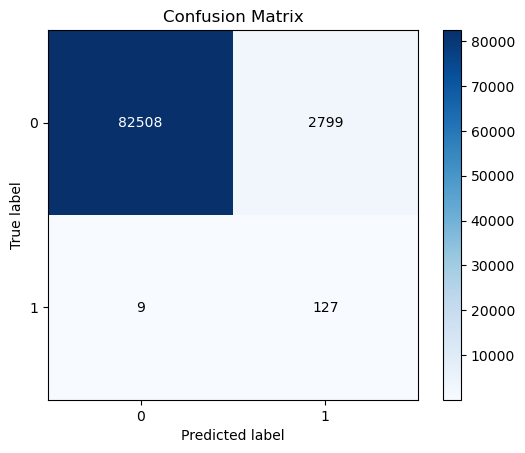

In [161]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)
skplt.metrics.plot_confusion_matrix(y_test, pred)


In [162]:
print(accuracy_score(y_test, pred))
print (classification_report(y_test, pred))

0.9671359853937713
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.97      0.98     85443




##### After evaluating the model on the holdout dataset, notable changes are observed. The accuracy remains high at around 0.966. The model's ability to identify fraudulent transactions has improved significantly, reducing classification errors from 61 to 12. However, the model now mislabels more valid transactions, with misclassifications increasing from 15 to 2857. This illustrates the ongoing challenge of achieving a balance between precision and recall, especially in imbalanced datasets. The results highlight the trade-off between effectively identifying rare events and minimizing false positives, underscoring the importance of careful consideration for real-world deployment.






### Apply Grid Search

In [163]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()  # Instantiate a new logistic regression model
param_grid = {"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              "penalty": ['l1', 'l2']}  # Parameters

grid_search = GridSearchCV(lr, param_grid, scoring="precision")  # Score
grid_search.fit(X_undersampled_train, Y_undersampled_train)

best_lr = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Precision Score:", best_score)


Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Precision Score: 0.9638586956521739


In [164]:
lr_undersampled = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

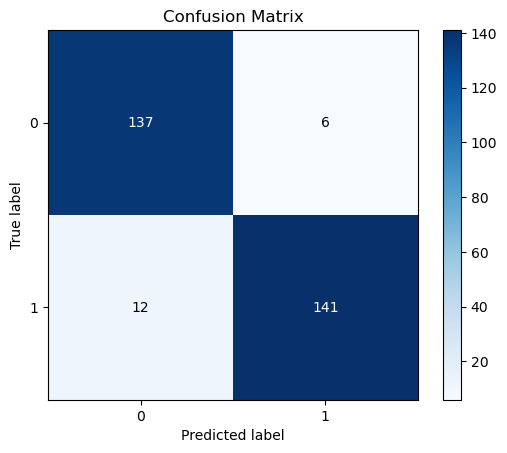

In [165]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)


In [166]:
print( accuracy_score(Y_undersampled_test, pred))
print (classification_report(Y_undersampled_test, pred))


0.9391891891891891
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       143
           1       0.96      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



#### Upon applying the optimized model to the balanced dataset, the evaluation results are consistent with the previous application. The accuracy remains at about 0.939. The precision, recall, and F1-score for both the "normal" and "fraudulent" classes are balanced, with a slight improvement over the initial evaluation. This indicates that the parameter optimization didn't drastically change the model's performance but helped fine-tune its efficiency.



In [167]:
lr = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

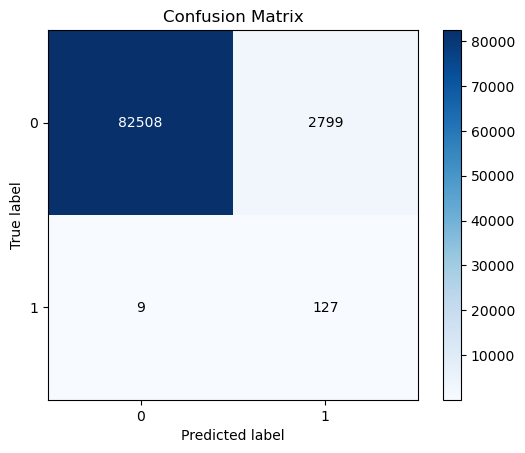

In [168]:
skplt.metrics.plot_confusion_matrix(y_test, pred)


In [169]:
print(accuracy_score(y_test, pred))
print (classification_report(y_test, pred))

0.9671359853937713
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.97      0.98     85443



#### Upon applying the optimized model to the entire dataset, the evaluation results indicate an accuracy of approximately 0.967. Precision for the "fraudulent" class remains low at 0.04, illustrating the ongoing challenge of correctly identifying instances of fraud while minimizing false positives. However, the recall has significantly improved to 0.93, emphasizing the model's better ability to capture actual fraudulent transactions.

#### This shift in recall is reflected in the F1-score, which, although still low, indicates a more balanced trade-off between precision and recall. This signifies the model's advancement in effectively identifying fraud instances compared to earlier evaluations.

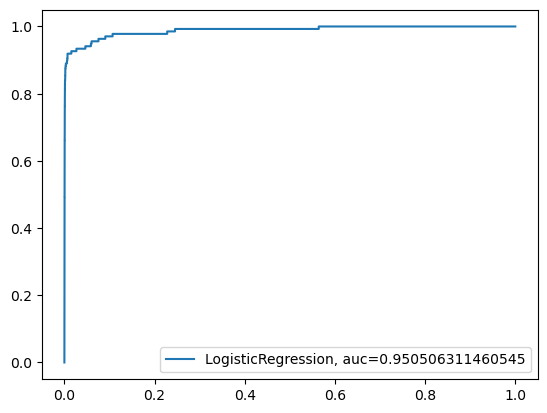

In [171]:
from sklearn import metrics
import matplotlib.pyplot as plt

clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_undersampled_train, Y_undersampled_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Classifier performance is often assessed using the ROC and AUC curve. The ROC curve illustrates how well the classifier can differentiate between two outcomes by comparing true-positive rates to false-positive rates. Derived from the ROC curve, the AUC (area under the curve) quantifies the degree of separability. A higher AUC indicates better performance in distinguishing between classes. A perfect model's AUC is near 1, signifying excellent separability, while a poor model has an AUC near 0, implying misclassification. An AUC of 0.5 suggests no class separation ability. In this case, the classifier achieved a strong result with an AUC of 0.95, highlighting its effectiveness in distinguishing between fraudulent and normal transactions.




